In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
dataset = pd.read_csv('Data/Artificial.csv')
dataset.head()

,8.04731,-4.88662,0
0,11.23750,3.017460,0
1,5.11050,0.269883,0
2,6.34456,-3.718320,0
3,9.09493,2.028360,0
4,8.01686,-2.264840,0


In [5]:
# we are interested in annual income and spending score cols 
data = dataset.iloc[:,[0,1]].values
data

array([[11.2375  ,  3.01746 ],
       [ 5.1105  ,  0.269883],
       [ 6.34456 , -3.71832 ],
       ...,
       [ 6.0661  ,  1.59668 ],
       [ 3.9714  ,  2.91487 ],
       [ 5.2171  ,  3.1451  ]])

In [6]:
# lets visual this to determine K clusters 
data.shape

(1008, 2)

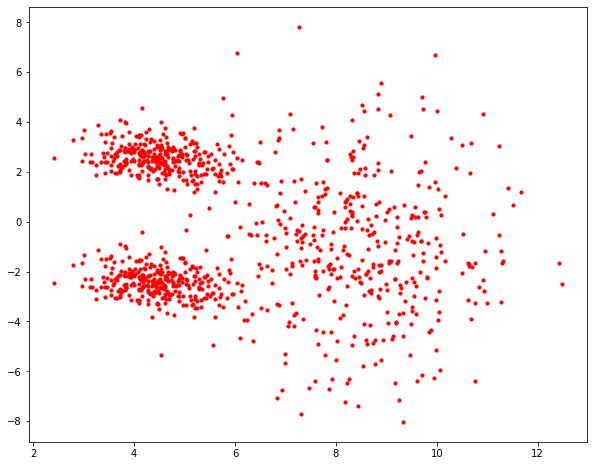

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], s = 10, color='red')

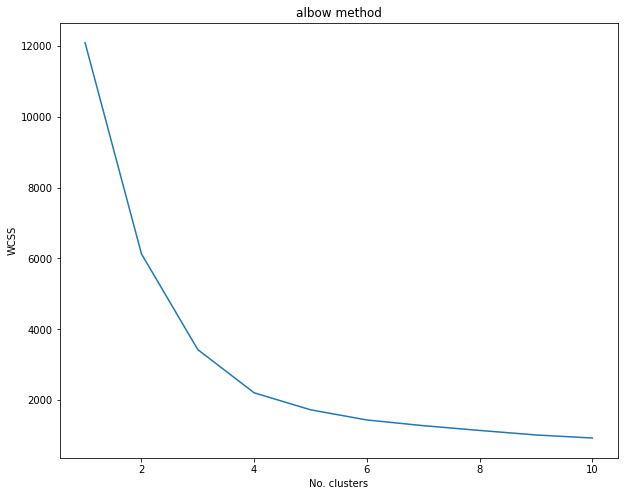

In [8]:
# as we can observe we have 5 clusters 
# lets find k clusters using k-means algorithm 

from sklearn.cluster import KMeans

# lets create list to store With-in cluster sum of squares for each k 
wcss =list()
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , max_iter=300 , n_init=10 )
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# lets plot wcss score for each cluster 
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss)
plt.title('albow method')
plt.xlabel('No. clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# its quiet obvious the no of clusters is 5 

In [22]:
# eps from wcss plot
from sklearn.cluster import DBSCAN
db = DBSCAN(eps= 0.7, min_samples=4)
# fit method not return for each object witch cluster it has been assigned 
labels = db.fit_predict(data)
#labels


In [23]:
#-1 label for noise points and regular labels from 0 onwards 
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

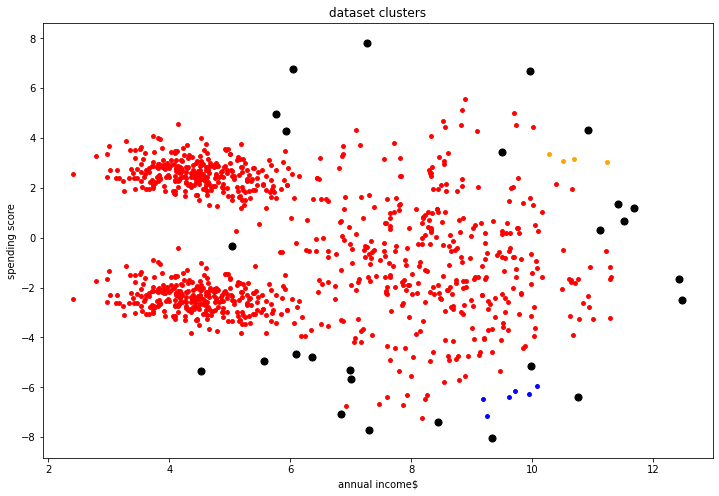

In [24]:
# lets visualize the clusters with its datapoints assinged and centeriod 
plt.figure(figsize=(12,8))
plt.scatter(data[labels == 0, 0],data[labels == 0, 1] , s=15, color='red')# cluster 0 for first and second col
plt.scatter(data[labels == 1, 0],data[labels == 1, 1] , s=15, color='blue')
plt.scatter(data[labels == 2, 0],data[labels == 2, 1] , s=15, color='orange')
plt.scatter(data[labels == 3, 0],data[labels == 3, 1] , s=15, color='purple')
plt.scatter(data[labels == 4, 0],data[labels == 4, 1] , s=15, color='green')

plt.scatter(data[labels == -1, 0], data[labels == -1,1] ,s= 50 ,color = 'black') ## noise 
plt.title('dataset clusters')
plt.xlabel('annual income$')
plt.ylabel('spending score')
plt.show()

In [29]:
# the key idea of dbscan is that the objects belonging to certain cluster should be denser compared to its surronding 
# its on of DBscan drawbacks is that clusters vart signficantilly from each other
# works well with outliers 

In [ ]:
# when the range of epslion is very small and we are not able to acheive the right number of clusters then its time to 
# play around with min-samples/neighbors and change it 


# the DBscan generally fails when the densities of the clusters are differnet 
# its good at handling clusters with diff. sizes or clusters with non-spherical shapes or round like shapes 